## EDA based on https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
A dataset for diabetes health indicators

### author: Huy Nguyen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def readFile():
	df = pd.read_csv('datasets/archive/diabetes_012_health_indicators_BRFSS2015.csv')
	return df

df = readFile()

In [2]:
print(df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [3]:
print(df.describe(include='all'))

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [4]:
print(df['Diabetes_012'].value_counts())

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


- Unbalanced dataset => need to balance it

In [63]:
# cut off entries so that three groups are balanced randomly

df_0 = df[df['Diabetes_012'] == 0]
df_1 = df[df['Diabetes_012'] == 1]
df_2 = df[df['Diabetes_012'] == 2]

size = min(len(df_0), len(df_1), len(df_2))
print(size)

df_0 = df_0.sample(n=size, random_state=1)
df_1 = df_1.sample(n=size, random_state=1)
df_2 = df_2.sample(n=size, random_state=1)

df = pd.concat([df_0, df_1, df_2])



4631


array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

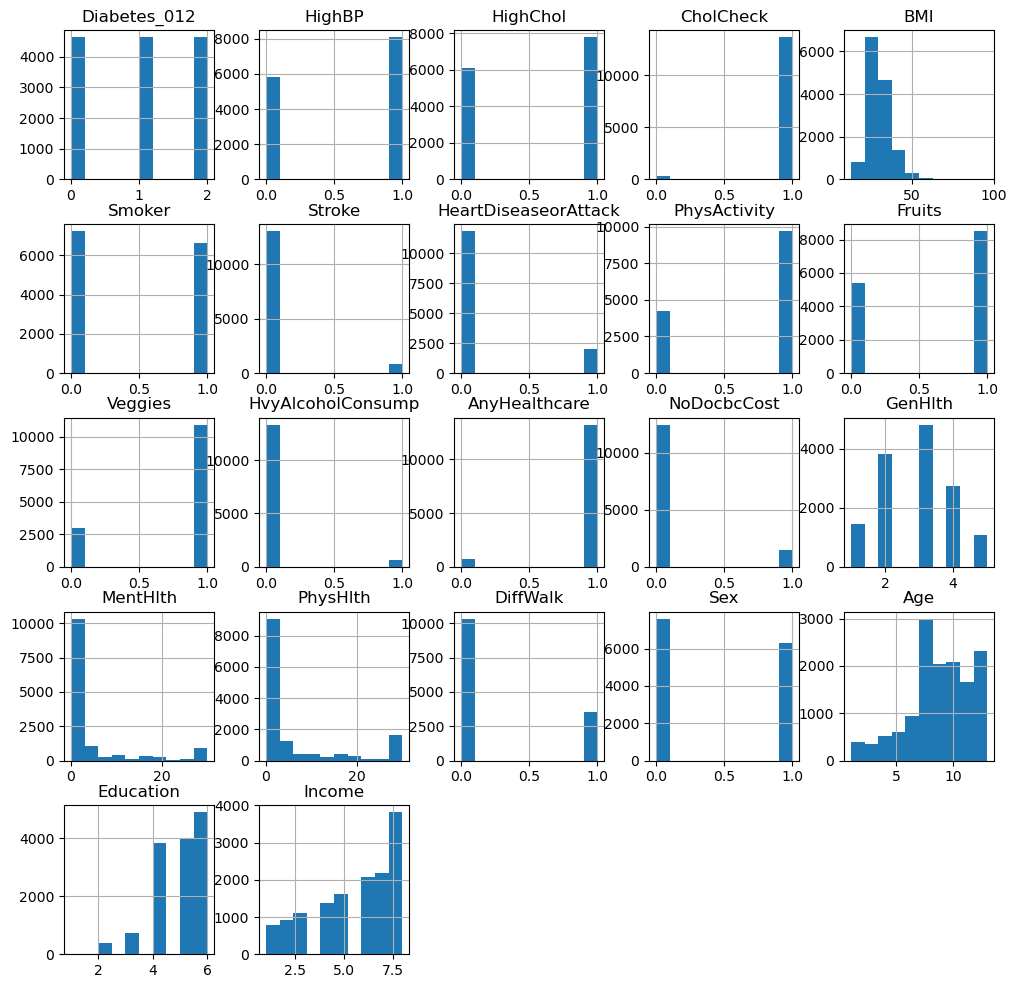

In [66]:
df.hist(figsize=(12,12))

- plot the correlation betwen feature

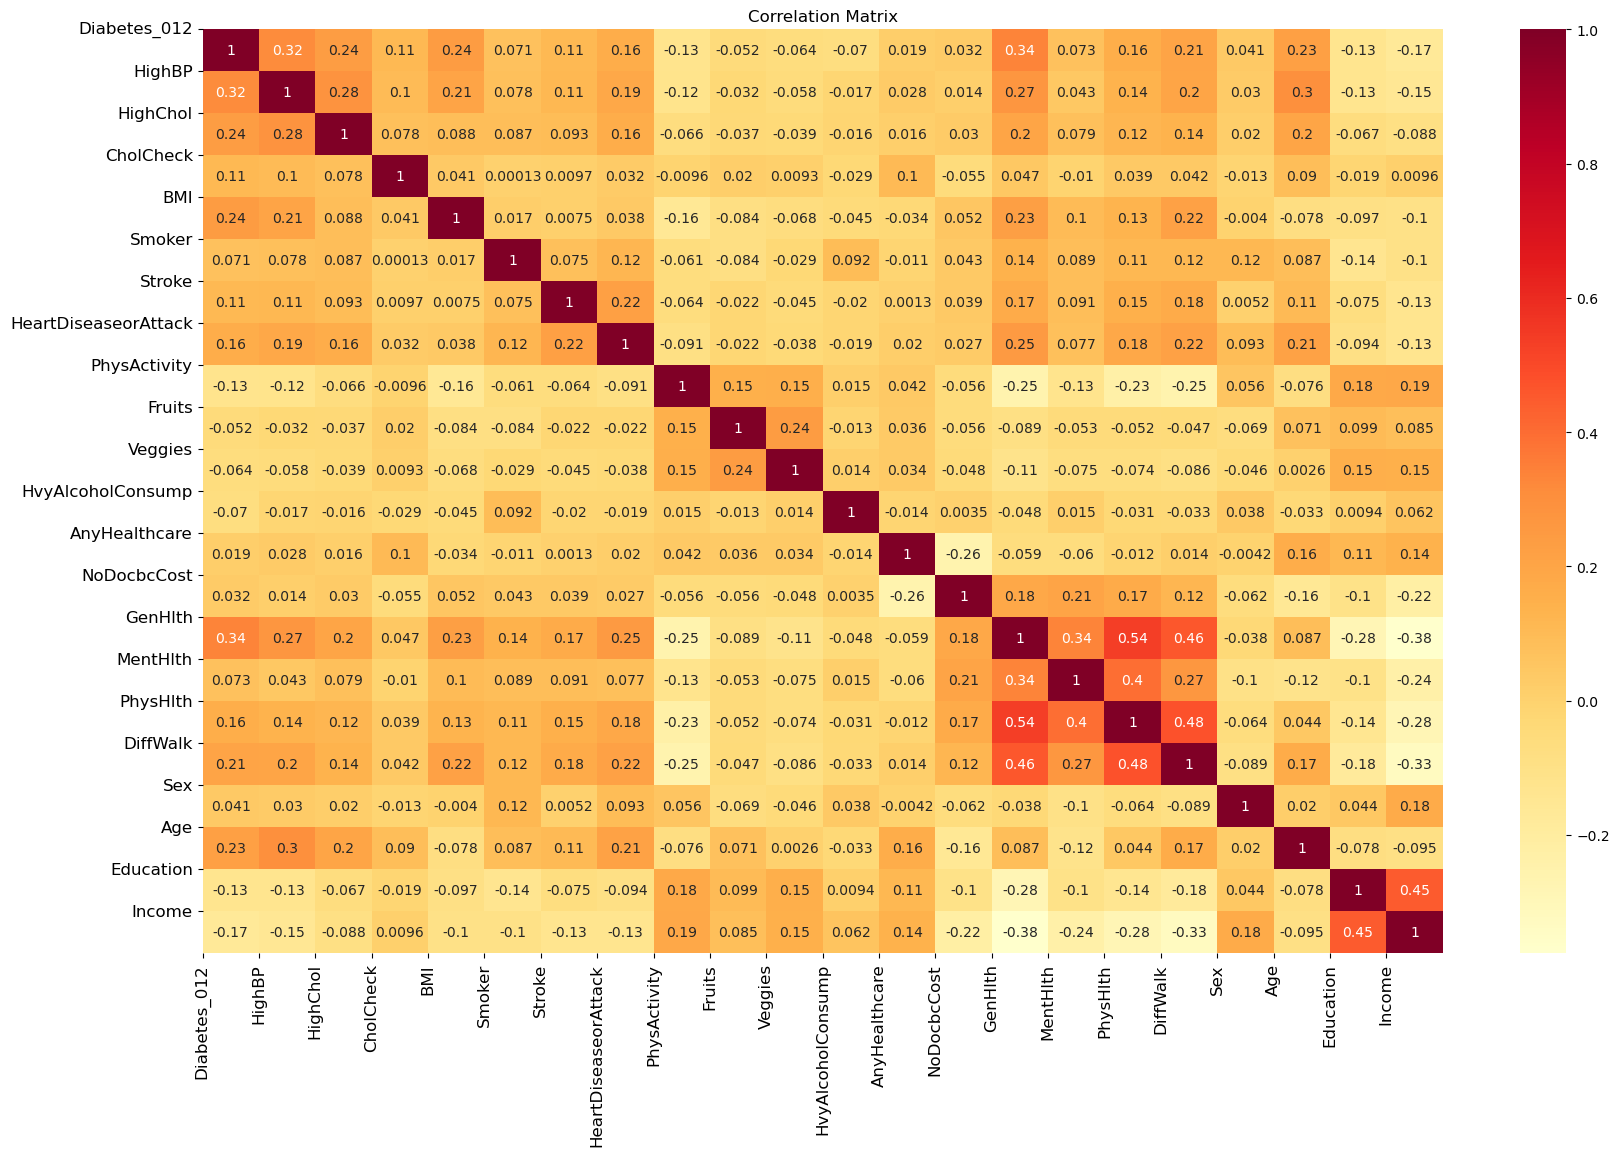

In [71]:
corr = df.corr()

fig = plt.figure(figsize=(20, 12))

sns.heatmap(corr ,annot=True , cmap ='YlOrRd' )
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=12, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=12)


plt.title('Correlation Matrix', fontsize=12);

plt.show()

- investigate the correlation between dieabetes and other health indicators to sort out top indicators that are highly correlated with diabetes as well as top negatively correlated indicators with diabetes

In [7]:
top_corr_features = corr['Diabetes_012'].sort_values(ascending=False).index[1:7]
print("Top Correlated Features")
print(corr[top_corr_features].loc['Diabetes_012'])

neg_corr_features = corr['Diabetes_012'].sort_values(ascending=True).index[0:6]
print("Negative Correlated Features")
print(corr[neg_corr_features].loc['Diabetes_012'])


Top Correlated Features
GenHlth     0.335376
HighBP      0.316972
BMI         0.242583
HighChol    0.239558
Age         0.225038
DiffWalk    0.209520
Name: Diabetes_012, dtype: float64
Negative Correlated Features
Income              -0.167375
Education           -0.130823
PhysActivity        -0.128931
HvyAlcoholConsump   -0.070327
Veggies             -0.063639
Fruits              -0.051744
Name: Diabetes_012, dtype: float64


- Sorted correlation matrix in descending order


Correlation Matrix
Diabetes_012            1.000000
GenHlth                 0.335376
HighBP                  0.316972
BMI                     0.242583
HighChol                0.239558
Age                     0.225038
DiffWalk                0.209520
HeartDiseaseorAttack    0.164616
PhysHlth                0.158537
CholCheck               0.112453
Stroke                  0.108360
MentHlth                0.073256
Smoker                  0.071118
Sex                     0.041092
NoDocbcCost             0.031863
AnyHealthcare           0.019111
Fruits                 -0.051744
Veggies                -0.063639
HvyAlcoholConsump      -0.070327
PhysActivity           -0.128931
Education              -0.130823
Income                 -0.167375
Name: Diabetes_012, dtype: float64


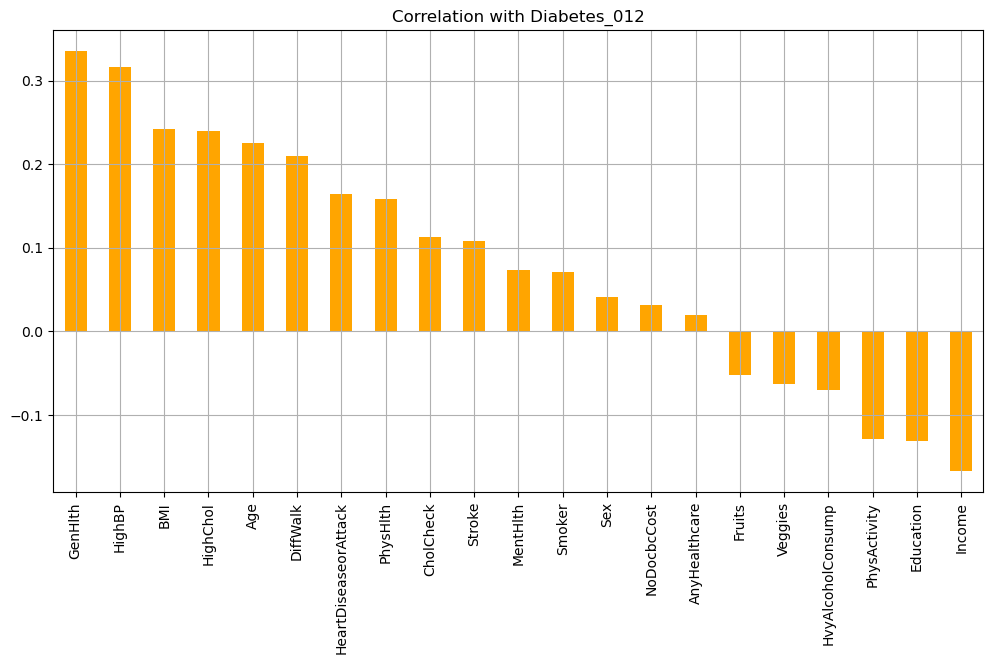

In [76]:
print("Correlation Matrix")
print(corr['Diabetes_012'].sort_values(ascending=False))

# plot corr[Diabetes_012]

plt.figure(figsize=(12,6))
corr['Diabetes_012'].sort_values(ascending=False).drop('Diabetes_012').plot(kind='bar',grid=True,color="Orange")
plt.title('Correlation with Diabetes_012')
plt.show()


- Perform Chi-Square Test on Diabetes with top features

In [9]:
from scipy.stats import chi2_contingency

top_feat_name = top_corr_features.values

# drop BMI because it is a function of weight and height not categorical
top_feat_name = np.delete(top_feat_name, 2)

print(top_feat_name)
for f in top_feat_name:
	
	df_crosstab = pd.crosstab(df[f], df['Diabetes_012'])
	print("Cross Tabulation for " + f)
	print(df_crosstab)
	stat, p, dof, expected = chi2_contingency(df_crosstab)
	print('dof=%d' % dof)
	print(expected)
	# interpret test-statistic
	# interpret p-value
	alpha = 0.005
	print('significance=%.3f, p=%.15f' % (alpha, p))
	if p <= alpha:
		print('Dependent (reject H0)')
	else:
		print('Independent (fail to reject H0)')
	print("\n")


['GenHlth' 'HighBP' 'HighChol' 'Age' 'DiffWalk']
Cross Tabulation for GenHlth
Diabetes_012   0.0   1.0   2.0
GenHlth                       
1.0            957   313   164
2.0           1736  1214   864
3.0           1346  1728  1737
4.0            424  1025  1291
5.0            168   351   575
dof=8
[[ 478.          478.          478.        ]
 [1271.33333333 1271.33333333 1271.33333333]
 [1603.66666667 1603.66666667 1603.66666667]
 [ 913.33333333  913.33333333  913.33333333]
 [ 364.66666667  364.66666667  364.66666667]]
significance=0.005, p=0.000000000000000
Dependent (reject H0)


Cross Tabulation for HighBP
Diabetes_012   0.0   1.0   2.0
HighBP                        
0.0           2938  1718  1164
1.0           1693  2913  3467
dof=2
[[1940. 1940. 1940.]
 [2691. 2691. 2691.]]
significance=0.005, p=0.000000000000000
Dependent (reject H0)


Cross Tabulation for HighChol
Diabetes_012   0.0   1.0   2.0
HighChol                      
0.0           2855  1756  1506
1.0           1776  2

- Conclusion all 5 features test result in rejecting H0, which means they have statistical significance in indication the relatioship with Diabetes.
- Alpha = 0.005

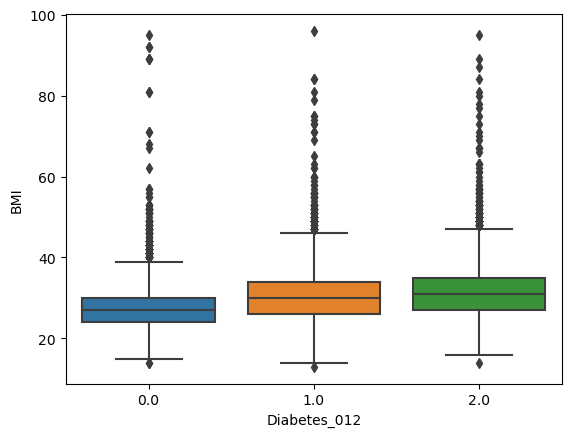

In [10]:
# BMI ANOVA
# plot box plot

import seaborn as sns
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.show()


In [11]:
# ANOVA f_oneway
print("The Distribution of BMI for each Diabetes_012 group is rather uniform. Therefore, ANOVA is used to test the difference between the means of the groups.")

from scipy.stats import f_oneway

df_0 = df[df['Diabetes_012'] == 0]['BMI']
df_1 = df[df['Diabetes_012'] == 1]['BMI']
df_2 = df[df['Diabetes_012'] == 2]['BMI']

stat, p = f_oneway(df_0, df_1, df_2)

print('stat=%.3f, p=%.2e' % (stat, p))

alpha = 0.005
print('significance=%.3f, p=%.15f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')


# ANOVA OLS
import statsmodels.api as sm 
from statsmodels.formula.api import ols

mod = ols('BMI ~ Diabetes_012', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)


The Distribution of BMI for each Diabetes_012 group is rather uniform. Therefore, ANOVA is used to test the difference between the means of the groups.
stat=465.898, p=1.45e-196
significance=0.005, p=0.000000000000000
Dependent (reject H0)
                     sum_sq       df           F         PR(>F)
Diabetes_012   41731.332326      1.0  868.550869  3.186397e-185
Residual      667421.976391  13891.0         NaN            NaN


- Conclusion, statistical significance.


### Perform RFE

In [35]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# SVR
svr = SVR(kernel='linear')
lr = LogisticRegression()
# Create the RFE object and rank each pixel
rfe = RFE(estimator=lr, n_features_to_select=6)
X = df.drop(['Diabetes_012'], axis=1)
Y = df['Diabetes_012']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

rfe.fit(x_train, y_train)

topFeats = [f[1] for f in sorted(zip(rfe.ranking_, X.columns))[0:5]]


/Users/vickieduong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vickieduong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [36]:
print(top_corr_features)
print(topFeats)

diff = np.setdiff1d(topFeats,top_corr_features)
# perform chi2_contingency on the difference

print(diff)

for f in diff:
	df_crosstab = pd.crosstab(df[f], df['Diabetes_012'])
	print("Cross Tabulation for " + f)
	print(df_crosstab)
	stat, p, dof, expected = chi2_contingency(df_crosstab)
	print('dof=%d' % dof)
	print(expected)
	# interpret test-statistic
	# interpret p-value
	alpha = 0.005
	print('significance=%.3f, p=%.15f' % (alpha, p))
	if p <= alpha:
		print('Dependent (reject H0)')
	else:
		print('Independent (fail to reject H0)')



Index(['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk'], dtype='object')
['CholCheck', 'GenHlth', 'HighBP', 'HighChol', 'HvyAlcoholConsump']
['CholCheck' 'HvyAlcoholConsump']
Cross Tabulation for CholCheck
Diabetes_012   0.0   1.0   2.0
CholCheck                     
0.0            196    62    18
1.0           4435  4569  4613
dof=2
[[  92.   92.   92.]
 [4539. 4539. 4539.]]
significance=0.005, p=0.000000000000000
Dependent (reject H0)
Cross Tabulation for HvyAlcoholConsump
Diabetes_012        0.0   1.0   2.0
HvyAlcoholConsump                  
0.0                4359  4423  4520
1.0                 272   208   111
dof=2
[[4434. 4434. 4434.]
 [ 197.  197.  197.]]
significance=0.005, p=0.000000000000001
Dependent (reject H0)


- Result: both statistically significant
- proceed to do logistic regresison

## Logistic REgression

In [51]:
from sklearn import metrics

X = df.drop(['Diabetes_012'], axis=1)
Y = df['Diabetes_012']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

def classifier(cf, features):
	cf.fit(x_train[features], y_train)
	y_pred = cf.predict(x_test[features])

	print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
	print(confusion_matrix(y_test, y_pred))
	print(classification_report(y_test, y_pred))
	return y_pred

In [52]:
lr = LogisticRegression()

print("Logistic Regression with all Features")
classifier(lr, X.columns)

print("Logistic Regression with Top Features")
classifier(lr, topFeats)

Logistic Regression with all Features
Accuracy: 0.4965815041381792
[[560 172 152]
 [240 264 421]
 [197 217 556]]
              precision    recall  f1-score   support

         0.0       0.56      0.63      0.60       884
         1.0       0.40      0.29      0.33       925
         2.0       0.49      0.57      0.53       970

    accuracy                           0.50      2779
   macro avg       0.49      0.50      0.49      2779
weighted avg       0.49      0.50      0.49      2779

Logistic Regression with Top Features
Accuracy: 0.5059373875494783
[[594 126 164]
 [272 221 432]
 [224 155 591]]
              precision    recall  f1-score   support

         0.0       0.54      0.67      0.60       884
         1.0       0.44      0.24      0.31       925
         2.0       0.50      0.61      0.55       970

    accuracy                           0.51      2779
   macro avg       0.49      0.51      0.49      2779
weighted avg       0.49      0.51      0.49      2779



/Users/vickieduong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0., 0., 1., ..., 2., 2., 1.])

## Support Vector Classification

#### all features

In [53]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

print("SVC with all Features")
classifier(svc, X.columns)

print("SVC with Top Features")
classifier(svc, topFeats)




SVC with all Features
Accuracy: 0.5059373875494783
[[530 204 150]
 [203 329 393]
 [151 272 547]]
              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60       884
         1.0       0.41      0.36      0.38       925
         2.0       0.50      0.56      0.53       970

    accuracy                           0.51      2779
   macro avg       0.50      0.51      0.50      2779
weighted avg       0.50      0.51      0.50      2779

SVC with Top Features
Accuracy: 0.49082403742353364
[[534 139 211]
 [222 178 525]
 [179 139 652]]
              precision    recall  f1-score   support

         0.0       0.57      0.60      0.59       884
         1.0       0.39      0.19      0.26       925
         2.0       0.47      0.67      0.55       970

    accuracy                           0.49      2779
   macro avg       0.48      0.49      0.47      2779
weighted avg       0.48      0.49      0.47      2779



array([0., 0., 2., ..., 2., 2., 1.])

### Random FOrest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

print("Random Forest with all Features")
classifier(rfc, X.columns)

print("Random Forest with Top Features")
classifier(rfc, topFeats)


Random Forest with all Features
Accuracy: 0.4933429291111911
[[522 205 157]
 [225 335 365]
 [156 300 514]]
              precision    recall  f1-score   support

         0.0       0.58      0.59      0.58       884
         1.0       0.40      0.36      0.38       925
         2.0       0.50      0.53      0.51       970

    accuracy                           0.49      2779
   macro avg       0.49      0.49      0.49      2779
weighted avg       0.49      0.49      0.49      2779

Random Forest with Top Features
Accuracy: 0.4965815041381792
[[588 163 133]
 [262 262 401]
 [204 236 530]]
              precision    recall  f1-score   support

         0.0       0.56      0.67      0.61       884
         1.0       0.40      0.28      0.33       925
         2.0       0.50      0.55      0.52       970

    accuracy                           0.50      2779
   macro avg       0.48      0.50      0.49      2779
weighted avg       0.48      0.50      0.48      2779



array([0., 0., 1., ..., 2., 2., 1.])

### KNN

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

print("XGBoost with all Features")
classifier(xgb, X.columns)

print("XGBoost with Top Features")
classifier(xgb, topFeats)



XGBoost with all Features
Accuracy: 0.4926232457718604
[[528 212 144]
 [219 351 355]
 [154 326 490]]
              precision    recall  f1-score   support

         0.0       0.59      0.60      0.59       884
         1.0       0.39      0.38      0.39       925
         2.0       0.50      0.51      0.50       970

    accuracy                           0.49      2779
   macro avg       0.49      0.49      0.49      2779
weighted avg       0.49      0.49      0.49      2779

XGBoost with Top Features
Accuracy: 0.4973011874775099
[[588 161 135]
 [262 262 401]
 [204 234 532]]
              precision    recall  f1-score   support

         0.0       0.56      0.67      0.61       884
         1.0       0.40      0.28      0.33       925
         2.0       0.50      0.55      0.52       970

    accuracy                           0.50      2779
   macro avg       0.48      0.50      0.49      2779
weighted avg       0.48      0.50      0.49      2779



array([0, 0, 1, ..., 2, 2, 1])

## PCA Analysis


In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print("PCA with Logistic Regression")
lr.fit(x_train_pca, y_train)
y_pred = lr.predict(x_test_pca)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



PCA with Logistic Regression
Accuracy: 0.48614609571788414
[[574 140 170]
 [277 276 372]
 [211 258 501]]
              precision    recall  f1-score   support

         0.0       0.54      0.65      0.59       884
         1.0       0.41      0.30      0.35       925
         2.0       0.48      0.52      0.50       970

    accuracy                           0.49      2779
   macro avg       0.48      0.49      0.48      2779
weighted avg       0.48      0.49      0.48      2779



## Conclusion from model
- low accurary,
- no difference between rfe and pca
### todo
- Analyse features with Diabetes_012